## NLP Class Assignment 3

#### Import Package

In [1]:
import re
import pandas as pd
import itertools
from nltk import ngrams
from nltk.metrics.distance import jaccard_distance
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import matplotlib.pyplot as plt
import nltk as nltk
import nltk.corpus  


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

#### Read news data

In [2]:
news_path = 'https://storage.googleapis.com/msca-bdp-data-open/news/nlp_a_3_news.json'
news_df = pd.read_json(news_path, orient='records', lines=True)

print(f'Sample contains {news_df.shape[0]:,.0f} news articles')
news_df.head(10)

Sample contains 1,018 news articles


,url,date,language,title,text
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik..."
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar..."
2,https://www.ktre.com/prnewswire/2022/06/07/syncron-price-selected-by-mitsubishi-motors-corporation-boost-enhanced-service-parts-pricing-strategy/,2022-06-07,en,Syncron Price Selected by Mitsubishi Motors Corporation to Boost Enhanced Service Parts Pricing Strategy,"Syncron Price Selected by Mitsubishi Motors Corporation to Boost Enhanced Service Parts Pricing StrategySkip to contentCircle - Country Music & LifestyleAdvertise With UsTeacher TributeAsk The ExpertThank A NurseBe ExcellentWatch LiveNewsElectionsVaccine TrackerVideoWeatherSportsCommunityContestsAbout UsCOVID-19SearchHomeSee it, Snap it, Send itNewsStorm of the CenturyNationalStateEditorialInvestigateEast Texas Ag NewsCrimeEast Texas NowThe Next NormalSept 11thWeatherSign Up for ThunderCallL..."
3,https://www.motoroids.com/news/mahindra-teases-its-future-electric-lineup/,2022-02-14,en,Mahindra Teases Its Future Electric Lineup! | Motoroids,Mahindra Teases Its Future Electric Lineup! | Motoroids Motoroids BlogMotoroids Forum AuthorsContact usSubmit storyAdvertise with usPrivacy Policy Search HomeAuto NewsFeaturesLaunchesUpcoming CarsUpcoming SUVsUpcoming BikesRecent LaunchesReviewsModsModified BikesModified CarsInteresting / Off-beatLists100cc Bikes110cc Bikes125cc Bikes150cc Bikes160cc Bikes200cc Bikes250cc Bikes300cc – 350cc BikesBikes In IndiaCars in IndiaForums Trending: Triumph Trident 660 Gets Pricier! HomeNewsMahindra Te...
4,https://auto.hindustantimes.com/jawa-bikes/dealers/vadodara,2022-01-07,en,Jawa Bikes Car Dealers - Jawa Bikes Showrooms in India,"Jawa Bikes Car Dealers - Jawa Bikes Showrooms in India Explore Saturday, 8 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar News..."
5,https://auto.hindustantimes.com/mahindra-cars/e2oplus/offers-in-darjeeling,2022-03-15,en,Mahindra E2o-plus Car Discount Offers in Darjeeling for March 2022,"Mahindra E2o-plus Car Discount Offers in Darjeeling for March 2022 Explore Tuesday, 15 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDeale

#### Read Tweets data

In [3]:
tweets_path = 'https://storage.googleapis.com/msca-bdp-data-open/tweets/nlp_a_3_tweets.json'
tweets_df = pd.read_json(tweets_path, orient='records', lines=True)
print(f'Sample contains {tweets_df.shape[0]:,.0f} tweets')
tweets_df.head(10)

Sample contains 1,020 tweets


,id,lang,date,name,retweeted,text
0,1491880241782005777,en,2022-02-10,Sir Botalot dropping the Mike!,,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥
1,1501237946590142469,en,2022-03-08,Sabrina Ghio,RT,"Australian GP Qualifying, Melbourne, 8th March 1997. #F1 The Grid ⬇️\n\nRow 3:\n5. Eddie Irvine (Ferrari) +2.512s\n6. Mika Hakkinen (McLaren-Mercedes) +2.602s\n\nRow 4:\n7. Johnny Herbert (Sauber-Petronas) +2.918s\n8. Jean Alesi (Benetton-Renault) +3.224s https://t.co/i4IC4LzVVN"
2,1505982695129718784,en,2022-03-21,Colin N. Walker 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇪🇺💙😷 #FBPE,RT,#BoycottRenault\n\nThink of the blood of thousands of Ukrainian women and children pouring from every Renault car. \n\nhttps://t.co/rbU01Sy9DU
3,1516744110463463426,en,2022-04-20,Yvette Lissman,RT,"Almost 200,000 workers in Russia still on western payrolls\n\nMcDonald’s, IKEA, Renault, Levi Strauss, &amp;others pay salaries to thousands of their employees while their operations in🇷🇺are suspended\nCoca-Cola, Yum Brands,KFC didn't confirm if they still pay🇷🇺s https://t.co/KWDhCo1dM0"
4,1493777143347630086,en,2022-02-16,Andile Xaba 🇿🇦,RT,Take a selfie with the New #Renault #ClioV and WIN R1000 fuel voucher 💥 tag @tableviewrenault &amp; #renaulttableviewcliov random winner announced 28.02.2022 @BradAtRenault 0825662336 to book a test drive 🇿🇦 https://t.co/D7V2GnJa8B
5,1542804207560019969,en,2022-07-01,Pendle Slot Racing,,"New Fly Renault 5 Turbo Rallye Monte-Carlo 1983/1985 special edition #slotcar set. Includes the No.9 car of Ragnotti/Andrie - 1983 Rallye Monte-Carlo, plus the snow effect No.10 car of Snobeck/Bechu - 1985 Rallye Monte-Carlo. https://t.co/uDOeljcHcV https://t.co/mSisBugCN4"
6,1534778811291684865,en,2022-06-09,Vickie L. Caldwell,RT,"Just Inspector Renault, the media professes to be shocked—shocked!—that top Democrats are involved in coordinated illegal ballot trafficking!"
7,1483588131173634048,en,2022-01-18,automobilsport,,3D sketching: a digital touch to every drawing - https://t.co/dIrCFvHGIT https://t.co/KjbM6xqctH photos Renault #renault #3dmodeling #3Danimation #3d #Sketching #sketch #projects #modelling #future #technology #designers #drawing #vrheadset #VR #creation #Automotivedesign #cars https://t.co/NzY3idDN3U
8,1540738855350833154,en,2022-06-25,"Hoses and Clamps,",,Silicone Radiator Hose Pipe +Clamps Fit For Renault 5GT R5 Turbo Super 1.4L Blue https://t.co/BCwYJCWZQn eBay https://t.co/CWeRrvdAvZ
9,1494617602248908800,en,2022-02-18,UK HAULIER,,Chosen Few: Four More Renault Trucks C Tippers for J T Few Plant Hire LTD\n\n@RenaultTrucksUK @JTFewPlantHire \n\n#Trucks #RenaultTrucks #Renault #Supplied \n\nhttps://t.co/TpnOzX2TZt


### Tweets data

#### Tokenize and Clean

In [4]:
# Filter out retweets
tweets_df = tweets_df[tweets_df['retweeted'] != 'RT']

## Remove URLs and Mentions
tweets_df["text_cleaned"] = tweets_df['text'].apply(lambda  x: re.sub(r'(?:\@|http?\://|https?\://|www)\S+', '', str(x)))

## Remove new lines
tweets_df["text_cleaned"] = tweets_df["text_cleaned"].apply(lambda x: re.sub(r'(?:\n)','|', str(x)))

tweets_df.shape[0]

463

In [5]:
# Function to tokenize and clean a single tweet
def tokenize_and_clean(tweet):
    # Initialize TweetTokenizer
    tweet_tokenizer = TweetTokenizer()
    
    # Tokenize the tweet
    words = tweet_tokenizer.tokenize(tweet)

    # Set of stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))

    # Cleaning steps
    words = [word for word in words if len(word) > 1]  # Remove single-character tokens
    words = [word for word in words if not word.isnumeric()]  # Remove numbers
    words = [word.lower() for word in words]  # Lowercase
    words = [word for word in words if not word.startswith('#')]  # Remove hashtags
    words = [word for word in words if word not in stopwords]  # Remove stopwords

    return words

# Apply the function to each row in the DataFrame
tweets_df['text_cleaned_tokens'] = tweets_df['text_cleaned'].apply(tokenize_and_clean)

In [6]:
tweets_df.head(10)

,id,lang,date,name,retweeted,text,text_cleaned,text_cleaned_tokens
0,1491880241782005777,en,2022-02-10,Sir Botalot dropping the Mike!,,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,Will you do a straight swap for my Renault Twingo 1.2 Extreme? ||That is awesome! 🔥,"[straight, swap, renault, twingo, 1.2, extreme, awesome]"
5,1542804207560019969,en,2022-07-01,Pendle Slot Racing,,"New Fly Renault 5 Turbo Rallye Monte-Carlo 1983/1985 special edition #slotcar set. Includes the No.9 car of Ragnotti/Andrie - 1983 Rallye Monte-Carlo, plus the snow effect No.10 car of Snobeck/Bechu - 1985 Rallye Monte-Carlo. https://t.co/uDOeljcHcV https://t.co/mSisBugCN4","New Fly Renault 5 Turbo Rallye Monte-Carlo 1983/1985 special edition #slotcar set. Includes the No.9 car of Ragnotti/Andrie - 1983 Rallye Monte-Carlo, plus the snow effect No.10 car of Snobeck/Bechu - 1985 Rallye Monte-Carlo.","[new, fly, renault, turbo, rallye, monte-carlo, 1983/1985, special, edition, set, includes, car, ragnotti, andrie, rallye, monte-carlo, plus, snow, effect, car, snobeck, bechu, rallye, monte-carlo]"
7,1483588131173634048,en,2022-01-18,automobilsport,,3D sketching: a digital touch to every drawing - https://t.co/dIrCFvHGIT https://t.co/KjbM6xqctH photos Renault #renault #3dmodeling #3Danimation #3d #Sketching #sketch #projects #modelling #future #technology #designers #drawing #vrheadset #VR #creation #Automotivedesign #cars https://t.co/NzY3idDN3U,3D sketching: a digital touch to every drawing - photos Renault #renault #3dmodeling #3Danimation #3d #Sketching #sketch #projects #modelling #future #technology #designers #drawing #vrheadset #VR #creation #Automotivedesign #cars,"[3d, sketching, digital, touch, every, drawing, photos, renault]"
8,1540738855350833154,en,2022-06-25,"Hoses and Clamps,",,Silicone Radiator Hose Pipe +Clamps Fit For Renault 5GT R5 Turbo Super 1.4L Blue https://t.co/BCwYJCWZQn eBay https://t.co/CWeRrvdAvZ,Silicone Radiator Hose Pipe +Clamps Fit For Renault 5GT R5 Turbo Super 1.4L Blue eBay,"[silicone, radiator, hose, pipe, clamps, fit, renault, 5gt, r5, turbo, super, 1.4, blue, ebay]"
9,1494617602248908800,en,2022-02-18,UK HAULIER,,Chosen Few: Four More Renault Trucks C Tippers for J T Few Plant Hire LTD\n\n@RenaultTrucksUK @JTFewPlantHire \n\n#Trucks #RenaultTrucks #Renault #Supplied \n\nhttps://t.co/TpnOzX2TZt,Chosen Few: Four More Renault Trucks C Tippers for J T Few Plant Hire LTD|| ||#Trucks #RenaultTrucks #Renault #Supplied ||,"[chosen, four, renault, trucks, tippers, plant, hire, ltd]"
10,1483130007820115984,en,2022-01-17,Ghostpup 🐾,,@sysable @Cavalonraptor I thought it was a v6 engine jointly made by Renault and Volvo 👀,I thought it was a v6 engine jointly made by Renault and Volvo 👀,"[thought, v6, engine, jointly, made, renault, volvo]"
11,1493816428637691909,en,2022-02-16,Market’s Cafe,,Renault Kiger gets 4-star adult safety rating in Global NCAP crash test Five stars indicates the highest score while zero star rating points to the minimum score during the vehicle crash test. #LatestNews by #MoneyControl https://t.co/rzBpqxWS1x,Renault Kiger gets 4-star adult safety rating in Global NCAP crash test Five stars indicates the highest score while zero star rating points to the minimum score during the vehicle crash test. #LatestNews by #MoneyControl,"[renault, kiger, gets, star, adult, safety, rating, global, ncap, crash, test, five, stars, indicates, highest, score, zero, star, rating, points, minimum, score, vehicle, crash, test]"
12,1506000451879292935,en,2022-03-21,A E,,@ToyotaUK 🇺🇦🇺🇦🇺🇦🇺🇦🇺🇦\nWhen will Toyota sell its stake in Renault?\nhttps://t.co/AAxBFeziNu,🇺🇦🇺🇦🇺🇦🇺🇦🇺🇦|When will Toyota sell its stake in Renault?|,"[🇺🇦, 🇺🇦, 🇺🇦, 🇺🇦, 🇺🇦, toyota, sell, stake, renault]"
14,1542807320886902784,en,2022-07-01,Alexander Glass,,"@garethlpowell Yes! All the dialogue is so sharp. \n\n""What kind of a man is Captain Renault?""\n""He's much like other men, only more so.""\n\nIt's funny

#### N-grams & Similarity Check

In [7]:
def generate_ngrams(tokens, n):
    if len(tokens) < n:
        return set()
    return set(ngrams(tokens, n))

def calculate_jaccard_distance(set1, set2):
    if not set1 or not set2:  # Check for empty sets
        return 1  # Max distance if one of the sets is empty
    return jaccard_distance(set1, set2)

# Range of n values to test
n_values = range(1, 5) 

# Calculate average Jaccard distance for each n
avg_distances = []
for n in n_values:
    distances = []
    # Generate n-grams and calculate distances for each pair of tweets
    for tweet1, tweet2 in itertools.combinations(tweets_df['text_cleaned_tokens'], 2):
        set1 = generate_ngrams(tweet1, n)
        set2 = generate_ngrams(tweet2, n)
        if set1 and set2:  # Only calculate if both sets are non-empty
            distances.append(calculate_jaccard_distance(set1, set2))

    # Compute average if distances list is not empty
    avg_distances.append(sum(distances) / len(distances) if distances else 0)

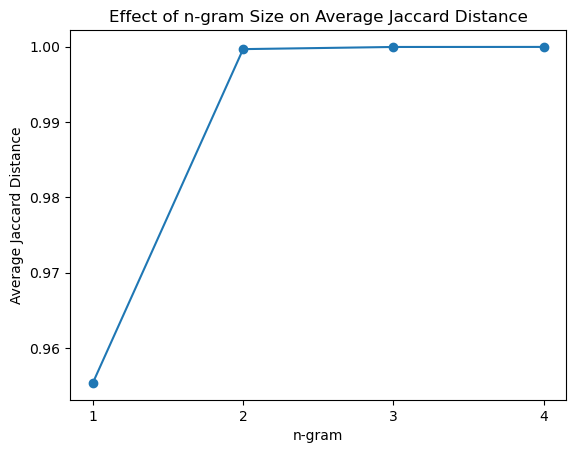

In [8]:
# Plotting
plt.plot(n_values, avg_distances, marker='o')  # Adding a marker for clarity
plt.xticks(n_values)  # Ensuring that only whole numbers are used for x-ticks
plt.xlabel('n-gram')
plt.ylabel('Average Jaccard Distance')
plt.title('Effect of n-gram Size on Average Jaccard Distance')
plt.show()

This graph indicates a steep increase in the average Jaccard distance as the n-gram size increases from 1 to 2, then the curve flattens out as the n-gram size increases to 3 and 4. In the context of news similarity:
* An n-gram size of 1 (unigram) would consider individual words, which might be too granular and could miss context. It shows the lowest Jaccard distance, suggesting high similarity across documents, but this may not be meaningful for understanding the similarity in terms of topics or events. 
* Moving to an n-gram size of 2 (bigram) introduces some context by considering pairs of words. The graph shows a significant jump in Jaccard distance at this point, which might indicate that using bigrams increases the differentiation between articles, possibly catching more specific language patterns.
* As we move to 3-grams and 4-grams, the increase in Jaccard distance slows down, suggesting that the addition of more context does not significantly change the overall dissimilarity metric at this point.
Thus, bigram would be a proper choose due to it's an elbow point

In [41]:
# Add a new column to the DataFrame for bi-grams
tweets_df['bi_grams'] = tweets_df['text_cleaned_tokens'].apply(lambda tokens: generate_ngrams(tokens, 2))

# Initialize an empty list to store the similarity scores
similarity_scores = []

# Calculate Jaccard distances for each pair of tweets, handling empty bi-grams sets
for (index1, tweet1), (index2, tweet2) in itertools.combinations(tweets_df.iterrows(), 2):
    score = calculate_jaccard_distance(tweet1['bi_grams'], tweet2['bi_grams'])
    similarity_scores.append((score, index1, index2))

# Continue with sorting the list and displaying the results as before...
# Sort the list of scores by the Jaccard distance
similarity_scores.sort()

# Display the most similar tweet pairs and their Jaccard distance
most_similar_tweets = similarity_scores[:20]  # Adjust number as needed
for score, index1, index2 in most_similar_tweets:
    print(f"Tweet {index1} and Tweet {index2} have a Jaccard Distance score of: {score:.4f}")


Tweet 44 and Tweet 196 have a Jaccard Distance score of: 0.0000
Tweet 292 and Tweet 502 have a Jaccard Distance score of: 0.0000
Tweet 292 and Tweet 583 have a Jaccard Distance score of: 0.0000
Tweet 502 and Tweet 583 have a Jaccard Distance score of: 0.0000
Tweet 15 and Tweet 378 have a Jaccard Distance score of: 0.1000
Tweet 88 and Tweet 955 have a Jaccard Distance score of: 0.2800
Tweet 24 and Tweet 385 have a Jaccard Distance score of: 0.6000
Tweet 80 and Tweet 838 have a Jaccard Distance score of: 0.7500
Tweet 328 and Tweet 519 have a Jaccard Distance score of: 0.7500
Tweet 286 and Tweet 938 have a Jaccard Distance score of: 0.8000
Tweet 385 and Tweet 521 have a Jaccard Distance score of: 0.8000
Tweet 759 and Tweet 815 have a Jaccard Distance score of: 0.8000
Tweet 825 and Tweet 892 have a Jaccard Distance score of: 0.8000
Tweet 319 and Tweet 762 have a Jaccard Distance score of: 0.8333
Tweet 385 and Tweet 656 have a Jaccard Distance score of: 0.8333
Tweet 745 and Tweet 892 have a

In [11]:
# Inspect the tweets with a Jaccard similarity score
for _, index1, index2 in most_similar_tweets:
    print(f"Tweet {index1}: {tweets_df.loc[index1]['text']}")
    print(f"Tweet {index2}: {tweets_df.loc[index2]['text']}")
    print("---")


Tweet 44: @renault_uk @RetromobileFR Welcome to the #renaulution journey #Renault @renaultgroup https://t.co/hcN6lky3E7
Tweet 196: @JoeCMerriman Welcome to the #renaulution journey #Renault @renaultgroup https://t.co/MAn4MjTCvN
---
Tweet 292: I AM A FUCKING DUSTER ((Dacia ))Duster Renault
Tweet 502: I AM A FUCKING DUSTER ((Dacia ))Duster Renault
---
Tweet 292: I AM A FUCKING DUSTER ((Dacia ))Duster Renault
Tweet 583: I AM A FUCKING DUSTER ((Dacia ))Duster Renault
---
Tweet 502: I AM A FUCKING DUSTER ((Dacia ))Duster Renault
Tweet 583: I AM A FUCKING DUSTER ((Dacia ))Duster Renault
---
Tweet 15: Renault Kiger is stunning yet muscular SUV stance is crafted to complement your free spirit. 
#renault #cars #nagercoil #Sportysmart #renaultcars #renaultindia #bestcars #buycarsnagercoil #morespacing  #renaultkiger https://t.co/0gaRyxca7h
Tweet 378: https://t.co/DFfqSVOypZ 
Kiger is stunning yet muscular SUV stance is crafted to complement your free spirit.
#renault #cars #nagercoil #Sportysmar

## News

In [42]:
news_df.head(5)

,url,date,language,title,text,text_cleaned_tokens,bi_grams
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik...","[lml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, sign, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, reserved, homeoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealer...","{(petrol, manual, lakhs, onwardsget, road, priceadd, comparehelp, us, basic, details), (cars, car, dealers, showrooms, indialml, bikes, car, dealers, showrooms, bodh), (newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact), (gayatrending, carssee, allkia, seltos1497, cc, petrol, manual, lakhs, onwardsget, road), (gayasearch, car, dealers, near, lml, bikes, dealers, found, bodh, gayatren..."
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar...","[pure, ev, bikes, car, dealers, pure, ev, bikes, showrooms, india, explore, friday, january, log, sign, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, reserved, homeoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calcul...","{(petrol, manual, lakhs, onwardsget, road, priceadd, comparehelp, us, basic, details), (newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact), (resend, otpsubmit, otpno, networkserver, issueinternet, availablewait, log, website, save, bookmarks), (agree, terms, privacy, policyview, offersdear, nameplease, verify, mobile, number, choose), (limited, rights, reserved, homeoffersnewfind, ca..."
2,https://www.ktre.com/prnewswire/2022/06/07/syncron-price-selected-by-mitsubishi-motors-corporation-boost-enhanced-service-parts-pricing-strategy/,2022-06-07,en,Syncron Price Selected by Mitsubishi Motors Corporation to Boost Enhanced Service Parts Pricing Strategy,"Syncron Price Selected by Mitsubishi Motors Corporation to Boost Enhanced Service Parts Pricing StrategySkip to contentCircle - Country Music & LifestyleAdvertise With UsTeacher TributeAsk The ExpertThank A NurseBe ExcellentWatch LiveNewsElectionsVaccine TrackerVideoWeatherSportsCommunityContestsAbout UsCOVID-19SearchHomeSee it, Snap it, Send itNewsStorm of the CenturyNationalStateEditorialInve

* Title Only: The title of a news article provides a concise summary of its content. Using only the title is useful when the goal is to understand the main theme or focus of the article quickly. There are some unclean text, such as extraneous characters and escape sequences (e.g., backslashes “\”). 
* Text Only: The full text of an article offers a comprehensive view of the subject matter, including details, context, and nuances that are not present in the title alone. 
* Title+Text approach can lead to redundancy, since the title is often included at the start of the text.

Thus, choose only column 'text' approach is better than others

#### Tokenize and Clean

In [12]:
# Function to tokenize and clean a single tweet
def tokenize_and_clean(news):
    # Initialize TweetTokenizer
    news_tokenizer = RegexpTokenizer(r'\w+')
    
    # Tokenize the tweet
    words = news_tokenizer.tokenize(news)

    # Set of stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))

    # Cleaning steps
    words = [word for word in words if len(word) > 1]  # Remove single-character tokens
    words = [word for word in words if not word.isnumeric()]  # Remove numbers
    words = [word.lower() for word in words]  # Lowercase
    words = [word for word in words if not word.startswith('#')]  # Remove hashtags
    words = [word for word in words if word not in stopwords]  # Remove stopwords

    return words

# Apply the function to each row in the DataFrame
news_df['text_cleaned_tokens'] = news_df['text'].apply(tokenize_and_clean)

#### N-grams & Similarity Check

In [17]:
# Range of n values to test
n_values = range(3, 11) 

# Calculate average Jaccard distance for each n
avg_distances = []
for n in n_values:
    distances = []
    # Generate n-grams and calculate distances for each pair of tweets
    for tweet1, tweet2 in itertools.combinations(news_df['text_cleaned_tokens'], 2):
        set1 = generate_ngrams(tweet1, n)
        set2 = generate_ngrams(tweet2, n)
        if set1 and set2:  # Only calculate if both sets are non-empty
            distances.append(calculate_jaccard_distance(set1, set2))

    # Compute average if distances list is not empty
    avg_distances.append(sum(distances) / len(distances) if distances else 0)

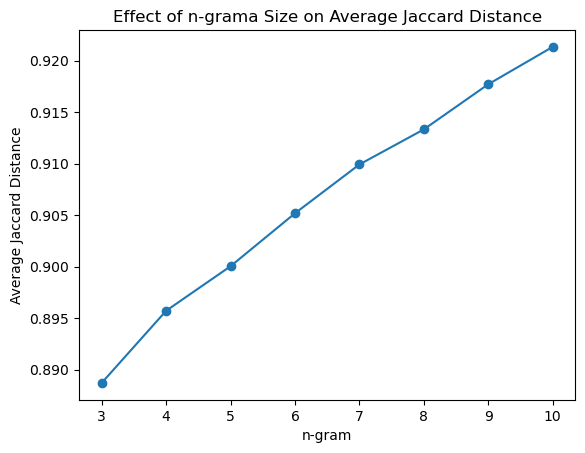

In [18]:
# Plotting
plt.plot(n_values, avg_distances, marker='o')  # Adding a marker for clarity
plt.xticks(n_values)  # Ensuring that only whole numbers are used for x-ticks
plt.xlabel('n-gram')
plt.ylabel('Average Jaccard Distance')
plt.title('Effect of n-grama Size on Average Jaccard Distance')
plt.show()

From the graph we know, the increase in Jaccard distance with larger n-grams could indicate that larger n-grams are less common across different texts, leading to a higher dissimilarity (or distance) between text samples when larger n-grams are used for comparison. A smaller n-gram might initially seem preferable because a smaller average Jaccard distance indicates higher similarity. Smaller n-grams (like trigrams or 4-grams) might capture more general language patterns which are common across many news articles. Larger n-grams (like 5-grams to 7-grams) might capture more specific phrases and terms that are unique to particular news stories, providing a better distinction between articles on different topics. 
This, 4-grams is a proper choice becuase this could be useful for finding broadly similar articles but might not differentiate well between articles on different events that use similar language.

In [48]:
# Add a new column to the DataFrame for four-grams
news_df['four_grams'] = news_df['text_cleaned_tokens'].apply(lambda tokens: generate_ngrams(tokens, 4))

# Initialize an empty list to store the similarity scores
similarity_scores = []

# Calculate Jaccard distances for each pair of tweets, handling empty four-grams sets
for (index1, news1), (index2, news2) in itertools.combinations(news_df.iterrows(), 2):
    score = calculate_jaccard_distance(news1['ten_grams'], news2['ten_grams'])
    similarity_scores.append((score, index1, index2))

# Sort the list of scores by the Jaccard distance
similarity_scores.sort()

In [49]:
# Display the most similar news pairs and their Jaccard distance
most_similar_news = similarity_scores[:50]  # Adjust number as needed
for score, index1, index2 in most_similar_news:
    print(f"News {index1} and News {index2} have a Jaccard distance of: {score:.4f}")

News 29 and News 38 have a Jaccard distance of: 0.0128
News 29 and News 39 have a Jaccard distance of: 0.0128
News 29 and News 46 have a Jaccard distance of: 0.0128
News 29 and News 161 have a Jaccard distance of: 0.0128
News 29 and News 406 have a Jaccard distance of: 0.0128
News 29 and News 663 have a Jaccard distance of: 0.0128
News 29 and News 846 have a Jaccard distance of: 0.0128
News 38 and News 39 have a Jaccard distance of: 0.0128
News 38 and News 46 have a Jaccard distance of: 0.0128
News 38 and News 161 have a Jaccard distance of: 0.0128
News 38 and News 406 have a Jaccard distance of: 0.0128
News 38 and News 663 have a Jaccard distance of: 0.0128
News 38 and News 846 have a Jaccard distance of: 0.0128
News 39 and News 46 have a Jaccard distance of: 0.0128
News 39 and News 161 have a Jaccard distance of: 0.0128
News 39 and News 406 have a Jaccard distance of: 0.0128
News 39 and News 663 have a Jaccard distance of: 0.0128
News 39 and News 846 have a Jaccard distance of: 0.012

In [52]:
# Inspect the news with a Jaccard similarity score of 0
for _, index1, index2 in most_similar_news:
    print(f"News {index1} and News {index2} have a Jaccard distance of: {_:.4f}")
    print(f"News {index1}: {news_df.loc[index1]['title']}")
    print(f"News {index2}: {news_df.loc[index2]['title']}")
    print("---")

News 29 and News 38 have a Jaccard distance of: 0.0128
News 29: Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022
News 38: Toyota Urban Cruiser Car Discount Offers in Kandhamal for March 2022
---
News 29 and News 39 have a Jaccard distance of: 0.0128
News 29: Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022
News 39: Toyota Urban Cruiser Car Discount Offers in Naharlagun for March 2022
---
News 29 and News 46 have a Jaccard distance of: 0.0128
News 29: Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022
News 46: Toyota Urban Cruiser Car Discount Offers in Mayurbhanja for March 2022
---
News 29 and News 161 have a Jaccard distance of: 0.0128
News 29: Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022
News 161: Toyota Urban Cruiser Car Discount Offers in Nirjuli for March 2022
---
News 29 and News 406 have a Jaccard distance of: 0.0128
News 29: Toyota Urban Cruiser Car Discount Offers in Kulgam for March 2022
News 406: Toyota U